
# Model przewidywania ceny laptopów na podstawie jego parametrów

##Autorzy:



* Wojciech Twarowski 217394,
* Jacek Wojciechowski 217505,
* Błażej Jóźwik 220203,
* Maja Wiśniewska 217331

##Streszczenie:


Projekt ma na celu przeprowadzenie analizy danych w celu zidentyfikowania głównych czynników wpływających na ceny laptopów oraz stworzenie modelu predykcyjnego przy użyciu regresji liniowej, który będzie prognozować ceny laptopów na podstawie ich parametrów technicznych.

Projekt będzie się skupiał na identyfikacji kluczowych czynników determinujących ceny laptopów, aby lepiej zrozumieć dynamikę rynku. Dzięki temu będziemy w stanie dostarczyć praktyczne narzędzie prdykcji cen laptopów, które pomoże zarówno konsumentom, jak i producentom, w podejmowaniu bardziej świadomych decyzji zakupowych oraz biznesowych.

Budowa modelu bedzie opierać sie na regresji liniowej oraz przetworzonych danych z kategorycznych i tekstowych na liczbowe.
Po przeprowadzonej wstepnej analizie byliśmy wstanie stworzyć 7 modeli predykcji sprawdzających sie MAE, MSE oraz RMSE.

Po przeanalizowaniu wyników każdego z modeli bylismy wstanie wysnuć wnioski na temat dokładności predykcji każdego z nich oraz zauważyć zależność, że wiekszość testowanych modeli ma podobną możliwość predykcji ceny.


##Słowa kluczowe:



* Analiza danych
* Regresja liniowa
* Laptopy        
* Cena Laptopa
* Dane
* Parametry       

##Wprowadzenie:


 Szybko zmieniający sie rynek oraz różnorodność technologii dosteonej na nim może stanowić wyzwanie dla konsumentów próbujących odnaleźć właściwą dla siebie technologie.

 Nasz projekt ma na celu przeanalizowanie czynników wpływających na cene laptopów i za pomocą metody regresji utworzyć model przewidujący cene na podstawie parametrów laptopa. Taka technologia pozwala konsumentom w szybki sposób przeprowadzić analize swoich planów zakupowych i oszacować cene laptopa o podanych parametrach.

 Prognoza ceny laptopów jest zadaniem niezwykle złożonym, uwzględniającym wiele czynników, które moga wpłynąć na ostateczną cene sprzętu. Szybki rozwuj technologii, popularność niektórych marek i technologii w internecie nie ułatwia dokonania predykcji. Dodatkowo, zmienność cen na rynku technologicznym sprawia, że prognozowanie cen staje się jeszcze wiekszym wyzwaniem, ponieważ ceny mogą ulegać szybkim zmianom z powodu wprowadzania nowych modeli, promocji lub zmian kursów walutowych.


## Przedmiot Badania:


###Cel i zakres badania:


Poprzez analizę danych, naszym celem jest stworzenie predykcji cen laptopów przy użyciu regresji liniowej oraz zgłębienie wpływu poszczególnych parametrów na te ceny.

Nasze badanie ma na celu nie tylko przewidzenie wartości produktów, ale także zrozumienie, jak różne czynniki wpływają na ostateczną cenę laptopa. W szczególności, dążymy do zbadania, które czynniki mają największy wpływ na wzrost ceny laptopa, co pozwoli nam lepiej zrozumieć, jakie cechy produktu mają największe znaczenie dla jego wartości rynkowej.


Zdobyte dane dotyczące różnych modeli laptopów, w tym ich specyfikacje techniczne i ceny, zostaną poddane procesowi czyszczenia, normalizacji i przetwarzania w celu przygotowania ich do analizy i modelowania.

### Przegląd literatury:

Zastosowanie regresji liniowej oraz sposób jej użycia:
*   T. Peiru, "Research On Laptop Price Predictive Model Based on Linear Regression, Random Forest and Xgboost", 2023.

Zastosowanie metody find_simmilar:
*   M. Kyosuke, "Analyzing online price by using machine learning techniques", 2018.
*   N. R. Draper, H. Smith, "Analiza regresji stosowana", 1973.
*   J. VanderPlas, "Python Data Science Handbook", 2023.
*   C. LReddy, K. B. Reddy, G. R. Anil, S. N. Mohanty, A. Basit, "Laptop Price Prediction Using Real Time Data", 2023



###Zmienne wybrane do analizy:






**Wybrane:**
* CPU - na podstawie danych z internetu pobrany zostaje benchmark, w którym wyższy wynik oznacza lepszy CPU
* GPU - analogicznie do CPU
* TypeName
* ScreenResolution - wykorzystujemy tylko rozdzielczość poziomą, bo ma lepszą korelację z ceną niż pionowa; wykorzystamy też informację czy ekran jest dotykowy
* Ram - prawie liniowa korelacja z ceną
* Memory - wykorzystujemy tylko informację czy ma dysk SSD, czy Flash           
* Company  
* OpSys


**Odrzucone:**
* Inches - skonsultowany ekspert stwierdził, że zależność rozmiaru ekranu od ceny jest mocno nieliniowa, bo najdroższe są laptopy z dużymi ekranami - gamingowe - oraz z mniejszymi ekranami - biznesowe. Poza tym ma niekorzystne p-value, co zostanie wykazane później
* Weight - podobnie jak z calami, nie ma bezpośredniego wpływu na cenę. Ma też wysokie p-value
* Product - nazwa produktu niczego nie mówi


**Price_euros to przewidywana wartość**

## Wstępna analiza danych







### Przetworzenie danych

Baza danych z której korzystamy ma duzo danych kategorycznych oraz tekstowych, które należałoby zamienić na dane liczbowe.

In [ ]:
!pip install fuzzywuzzy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
data = pd.read_csv("./laptop_price.csv", encoding='latin-1')

CPU - tu zamiast nazw CPU wczytamy ich benchmarki

In [ ]:
datacpu = pd.read_csv("./cpu.csv", encoding='utf-8')
counter = 0

def find_similar_cpu(cpu_name):
  global counter
  best_match = None
  best_score = 0
  for cpu in datacpu['CPU name']:
    score = fuzz.ratio(cpu_name.lower(), cpu.lower())
    if score > best_score:
      best_match = cpu
      best_score = score
  print(str(counter) + '. ' + cpu_name + '\t\t' + best_match)
  counter += 1
  return datacpu.loc[datacpu['CPU name'] == best_match, 'cpu bench (higher = better)'].values[0]

data['Cpu'] = data['Cpu'].apply(find_similar_cpu)

0. Intel Core i5 2.3GHz		Intel Core i3-530 @ 2.93GHz
1. Intel Core i5 1.8GHz		Intel Core i5-9400T @ 1.80GHz
2. Intel Core i5 7200U 2.5GHz		Intel Core i5-7200U @ 2.50GHz
3. Intel Core i7 2.7GHz		Intel Core i7-920 @ 2.67GHz
4. Intel Core i5 3.1GHz		Intel Core i5-9600 @ 3.10GHz
5. AMD A9-Series 9420 3GHz		AMD A9-9420
6. Intel Core i7 2.2GHz		Intel Core i7-8750H @ 2.20GHz
7. Intel Core i5 1.8GHz		Intel Core i5-9400T @ 1.80GHz
8. Intel Core i7 8550U 1.8GHz		Intel Core i7-8550U @ 1.80GHz
9. Intel Core i5 8250U 1.6GHz		Intel Core i5-8250U @ 1.60GHz
10. Intel Core i5 7200U 2.5GHz		Intel Core i5-7200U @ 2.50GHz
11. Intel Core i3 6006U 2GHz		Intel Core i3-6006U @ 2.00GHz
12. Intel Core i7 2.8GHz		Intel Core i7-860 @ 2.80GHz
13. Intel Core i3 6006U 2GHz		Intel Core i3-6006U @ 2.00GHz
14. Intel Core M m3 1.2GHz		Intel Core M-5Y71 @ 1.20GHz
15. Intel Core i5 2.3GHz		Intel Core i3-530 @ 2.93GHz
16. Intel Core i7 7500U 2.7GHz		Intel Core i7-7500U @ 2.70GHz
17. Intel Core i7 2.9GHz		Intel Core i7-870 

In [ ]:
data['Cpu'] = data['Cpu'].str.replace(',', '').astype(int)

GPU - tu też wczytamy benchmarki

In [ ]:
datagpu = pd.read_csv("./gpu.csv", encoding='utf-8')
counter = 0

def find_similar_gpu(gpu_name):
  global counter
  best_match = None
  best_score = 0
  for gpu in datagpu['Videcard Name']:
    score = fuzz.ratio(gpu_name.lower(), str(gpu).lower())
    if score > best_score:
      best_match = gpu
      best_score = score
  print(str(counter) + '. ' + gpu_name + '\t\t' + best_match)
  counter += 1
  return datagpu.loc[datagpu['Videcard Name'] == best_match, 'Passmark G3D Mark(higher is better)'].values[0]

data['Gpu'] = data['Gpu'].apply(find_similar_gpu)

0. Intel Iris Plus Graphics 640		Intel Iris Pro Graphics 6200
1. Intel HD Graphics 6000		Intel UHD Graphics 600
2. Intel HD Graphics 620		Intel HD Graphics 620
3. AMD Radeon Pro 455		Radeon Pro 455
4. Intel Iris Plus Graphics 650		Intel Iris Pro Graphics 6200
5. AMD Radeon R5		Radeon R5E
6. Intel Iris Pro Graphics		Intel Iris Pro Graphics 6200
7. Intel HD Graphics 6000		Intel UHD Graphics 600
8. Nvidia GeForce MX150		GeForce MX150
9. Intel UHD Graphics 620		Intel UHD Graphics 620
10. Intel HD Graphics 620		Intel HD Graphics 620
11. Intel HD Graphics 520		Intel HD Graphics 620
12. AMD Radeon Pro 555		Radeon Pro 555
13. AMD Radeon R5 M430		Radeon R5 M430
14. Intel HD Graphics 615		Intel UHD Graphics 615
15. Intel Iris Plus Graphics 640		Intel Iris Pro Graphics 6200
16. AMD Radeon R5 M430		Radeon R5 M430
17. AMD Radeon Pro 560		Radeon Pro 560
18. Nvidia GeForce 940MX		GeForce 940MX
19. Intel UHD Graphics 620		Intel UHD Graphics 620
20. Intel HD Graphics 400		Intel UHD Graphics 600
21. Nvi

w TypeName i Company zrobimy one-hot-encoding na końcu, więc przejdziemy teraz do ScreenResolution - tu chcemy wydobyć szerokość oraz informację o dotykowym ekranie

In [ ]:
data['X_res'] = data['ScreenResolution'].apply(lambda x: x.split()[-1].split("x")[0]).astype(int)
data['TouchScreen'] = (data['ScreenResolution'].str.contains('Touch')).astype(int)
data = data.drop(['ScreenResolution'], axis=1)

w RAM wystarczy usunąć GB i zmienić na liczbę

In [ ]:
data['Ram'] = data['Ram'].str.replace("GB", "").astype(int)

w Memory jedynie sprawdzamy czy ma SSD lub Flash_Storage

In [ ]:
data['SSD'] = (data['Memory'].str.contains('SSD')).astype(int)
data['Flash_Storage'] = (data['Memory'].str.contains('Flash')).astype(int)
data = data.drop(['Memory'], axis=1)

jakie mamy teraz kolumny i korelacje?

In [ ]:
print(data.columns)
data.corr(numeric_only=True)['Price_euros']

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Cpu', 'Ram',
       'Gpu', 'OpSys', 'Weight', 'Price_euros', 'X_res', 'TouchScreen', 'SSD',
       'Flash_Storage'],
      dtype='object')


laptop_ID        0.067830
Inches           0.068197
Cpu              0.570088
Ram              0.743007
Gpu              0.539029
Price_euros      1.000000
X_res            0.556529
TouchScreen      0.191226
SSD              0.513609
Flash_Storage   -0.210823
Name: Price_euros, dtype: float64

na podstawie wiedzy eksperta wnioskujemy, że waga nie będzie miała dobrego wpływu, ale sprawdzimy za chwilę z wykorzystaniem p-value

In [ ]:
data['Weight'] = data['Weight'].str.replace("kg", "").astype(float)

AttributeError: Can only use .str accessor with string values!

laptop_ID i Price_euros odłączymy; Product dropniemy

In [ ]:
x, y, id = data.drop(['Price_euros', 'Product', 'laptop_ID'], axis=1), data['Price_euros'], data['laptop_ID']

In [ ]:
print(x.columns)

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'X_res', 'TouchScreen', 'SSD', 'Flash_Storage'],
      dtype='object')


to teraz zrobimy one-hot encoding na zmiennych kategorycznych oraz przy okazji znormalizujemy dane liczbowe przy pomocy StandardScaler

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

onehot_transformer = ('onehot', OneHotEncoder(sparse_output=False), ['Company', 'TypeName', 'OpSys'])
scaler_transformer = ('scaler', StandardScaler(), ['Cpu', 'Ram', 'Gpu', 'X_res', 'Weight'])
transformer = ColumnTransformer(transformers=[onehot_transformer, scaler_transformer], remainder='passthrough')

x = pd.DataFrame(transformer.fit_transform(x), columns=transformer.get_feature_names_out())

In [ ]:
pd.concat([x, y], axis=1).corr()['Price_euros'].sort_values()

onehot__TypeName_Notebook             -0.549248
onehot__TypeName_Netbook              -0.097572
onehot__Company_HP                    -0.041291
onehot__Company_Lenovo                -0.029007
onehot__Company_Toshiba                0.040339
onehot__Company_Dell                   0.048509
onehot__Company_LG                     0.067053
onehot__TypeName_2 in 1 Convertible    0.072675
onehot__OpSys_Windows 7                0.152381
onehot__Company_MSI                    0.180100
onehot__Company_Razer                  0.233756
onehot__TypeName_Workstation           0.249752
onehot__TypeName_Ultrabook             0.255658
remainder__SSD                         0.513609
scaler__Gpu                            0.539029
scaler__X_res                          0.556529
scaler__Cpu                            0.570088
scaler__Ram                            0.743007
Price_euros                            1.000000
Name: Price_euros, dtype: float64

Po wykonaniu powyższego kodu otrzymujemy wyłączne dane numeryczne, dzięki czemu możemy przystąpić do dalszej analizy.

To czas na sprawdzenie p-value i odrzucenie złych kolumn

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Price_euros   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              1002.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:01:49   Log-Likelihood:                         -9448.7
No. Observations:                1303   AIC:                                  1.893e+04
Df Residuals:                    1285   BIC:                                  1.903e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [ ]:
param_table = model.summary().tables[1]
high_pvalue = []
for i in range(1, len(param_table.data)):
  if float(param_table.data[i][4]) > 0.05:
    high_pvalue.append(param_table.data[i][0])

print(high_pvalue)

[]


In [ ]:
x = x.drop(high_pvalue, axis=1)
print(x.columns)

Index(['onehot__Company_Dell', 'onehot__Company_HP', 'onehot__Company_LG',
       'onehot__Company_Lenovo', 'onehot__Company_MSI',
       'onehot__Company_Razer', 'onehot__Company_Toshiba',
       'onehot__TypeName_2 in 1 Convertible', 'onehot__TypeName_Netbook',
       'onehot__TypeName_Notebook', 'onehot__TypeName_Ultrabook',
       'onehot__TypeName_Workstation', 'onehot__OpSys_Windows 7',
       'scaler__Cpu', 'scaler__Ram', 'scaler__Gpu', 'scaler__X_res',
       'remainder__SSD'],
      dtype='object')


###Statystyki opisowe

użyjemy tu danych sprzed one-hot-encoding

In [ ]:
df = data.drop(['Inches', 'Product', 'laptop_ID', 'Weight'], axis=1)
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Price_euros',
       'X_res', 'TouchScreen', 'SSD', 'Flash_Storage'],
      dtype='object')

#### Cena

Statystyki:
Max: 6099.0
Min: 174.0
Średnia: 1123.6869915579434
Mediana: 979.0
Odchylenie standardowe: 698.7407604119677


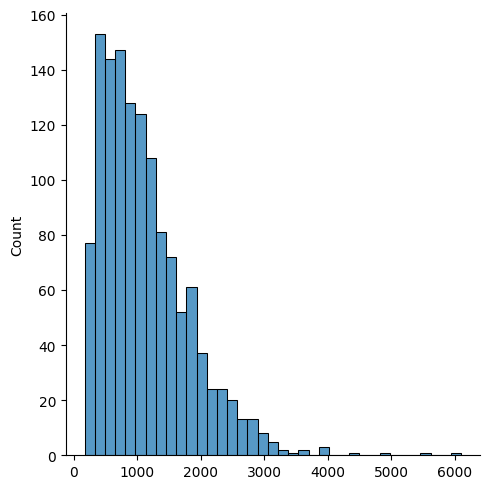

In [ ]:
col = list(df['Price_euros'])
maxx = max(col)
minn = min(col)
average = sum(col) / len(col)
if len(col) % 2 == 0:
       mediana = (sorted(col)[len(col) // 2] + sorted(col)[len(col) // 2 + 1]) / 2
else:
       mediana = sorted(col)[len(col) // 2 + 1]
from math import sqrt
odchylenie = sqrt(sum([(x - average)**2 for x in col]) / len(col))
print("Statystyki:")
print(f"Max: {maxx}")
print(f"Min: {minn}")
print(f"Średnia: {average}")
print(f"Mediana: {mediana}")
print(f"Odchylenie standardowe: {odchylenie}")

sns.displot(col)
plt.show()

jak widać mediana jest niestety znacząco po lewej stronie średniej. Jest to związane z faktem, że najlepiej sprzedają się tanie laptopy

#### CPU

Statystyki:
Max: 14818
Min: 392
Średnia: 3985.953952417498
Mediana: 3387
Odchylenie standardowe: 1986.169770836741


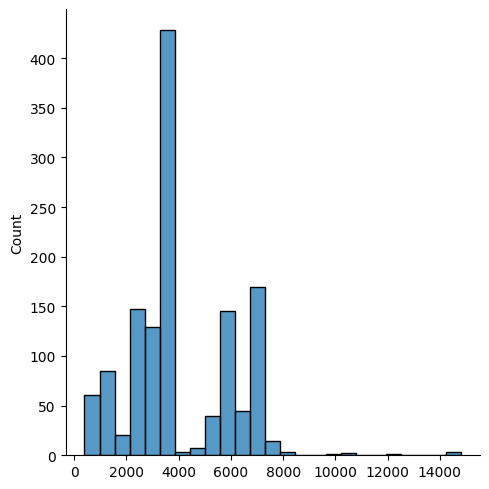

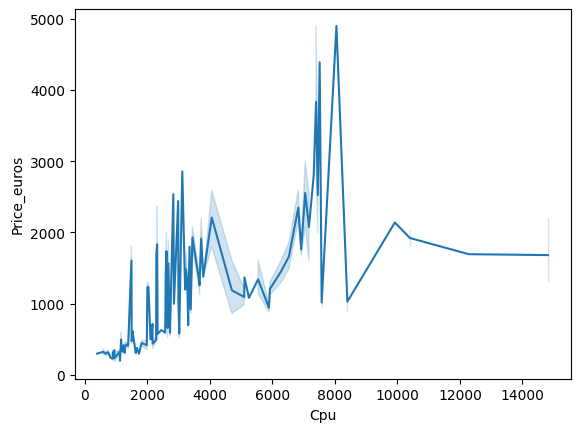

0.5700876724002313

In [ ]:
col = list(df['Cpu'])
maxx = max(col)
minn = min(col)
average = sum(col) / len(col)
if len(col) % 2 == 0:
       mediana = (sorted(col)[len(col) // 2] + sorted(col)[len(col) // 2 + 1]) / 2
else:
       mediana = sorted(col)[len(col) // 2 + 1]
from math import sqrt
odchylenie = sqrt(sum([(x - average)**2 for x in col]) / len(col))
print("Statystyki:")
print(f"Max: {maxx}")
print(f"Min: {minn}")
print(f"Średnia: {average}")
print(f"Mediana: {mediana}")
print(f"Odchylenie standardowe: {odchylenie}")

sns.displot(col)
plt.show()

sns.lineplot(x=df['Cpu'],y=df['Price_euros'])
plt.show()

df.corr(numeric_only=True)['Price_euros']['Cpu']

popularność wyników jest związana z popularnością konkretnych procesorów. Mediana jest blisko średniej. Korelacja z ceną jest dość silna

#### GPU

Statystyki:
Max: 22064.0
Min: 5.0
Średnia: 2249.6170376055256
Mediana: 926.0
Odchylenie standardowe: 3040.0572827415017


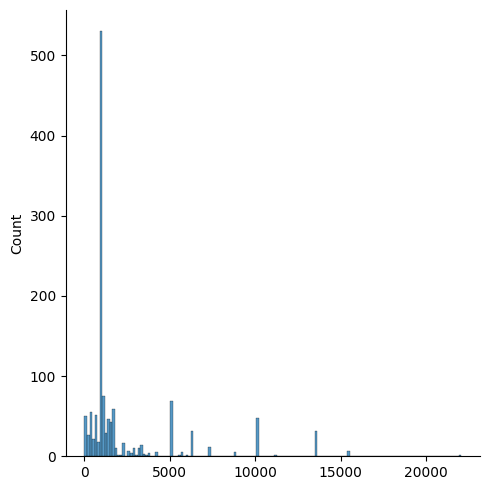

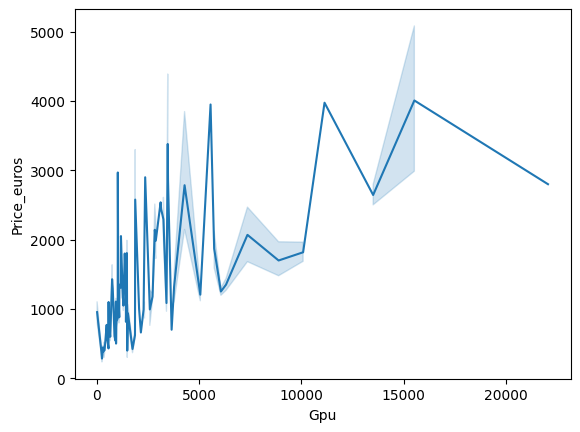

0.5390294330931712

In [ ]:
col = list(df['Gpu'])
maxx = max(col)
minn = min(col)
average = sum(col) / len(col)
if len(col) % 2 == 0:
       mediana = (sorted(col)[len(col) // 2] + sorted(col)[len(col) // 2 + 1]) / 2
else:
       mediana = sorted(col)[len(col) // 2 + 1]
from math import sqrt
odchylenie = sqrt(sum([(x - average)**2 for x in col]) / len(col))
print("Statystyki:")
print(f"Max: {maxx}")
print(f"Min: {minn}")
print(f"Średnia: {average}")
print(f"Mediana: {mediana}")
print(f"Odchylenie standardowe: {odchylenie}")

sns.displot(col)
plt.show()

sns.lineplot(x=df['Gpu'],y=df['Price_euros'])
plt.show()

df.corr(numeric_only=True)['Price_euros']['Gpu']

tu niestety mediana jest daleko od średniej, bo znaczna większość laptopów ma zintegrowane, słabe karty graficzne

#### TypeName, OpSys, Company

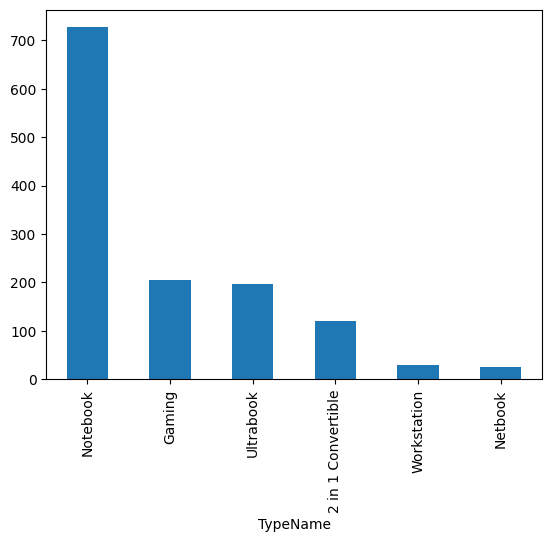

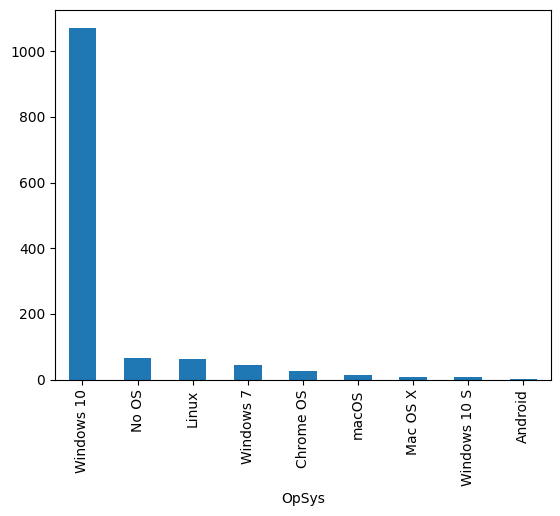

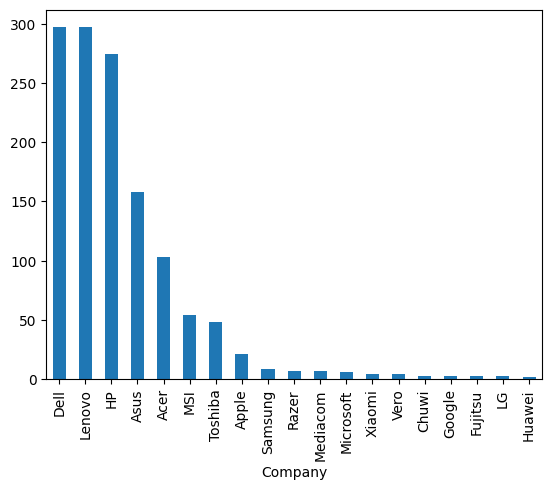

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')
plt.show()

df['OpSys'].value_counts().plot(kind='bar')
plt.show()

df['Company'].value_counts().plot(kind='bar')
plt.show()


wyniki są przewidywalne, związane z popularnością marek i zapotrzebowaniem na konkretne rodzaje laptopów. W związku z tym model najlepiej będzie przewidywał ceny popularnych marek i rodzajów laptopów, a w pozostałych przypadkach mogą nastąpić poważne błędy

#### Rozdzielczość ekranu

Statystyki:
Max: 3840
Min: 1366
Średnia: 1894.7843438219493
Mediana: 1920
Odchylenie standardowe: 494.45118331227553


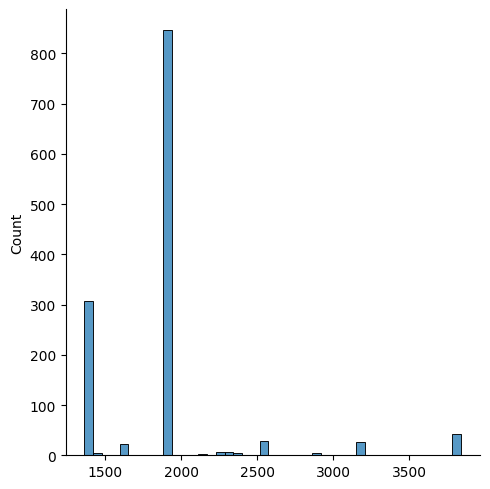

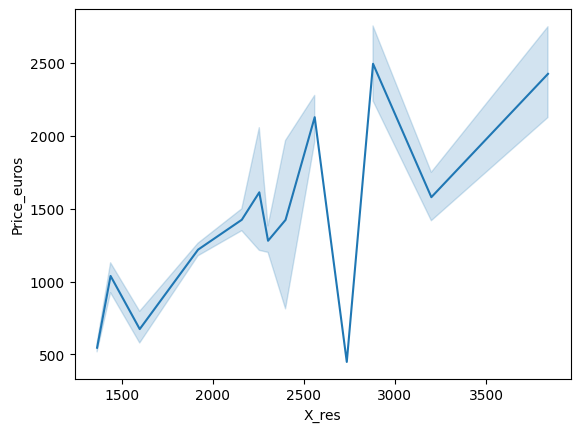

0.55652932871698

In [ ]:
col = list(df['X_res'])
maxx = max(col)
minn = min(col)
average = sum(col) / len(col)
if len(col) % 2 == 0:
       mediana = (sorted(col)[len(col) // 2] + sorted(col)[len(col) // 2 + 1]) / 2
else:
       mediana = sorted(col)[len(col) // 2 + 1]
from math import sqrt
odchylenie = sqrt(sum([(x - average)**2 for x in col]) / len(col))
print("Statystyki:")
print(f"Max: {maxx}")
print(f"Min: {minn}")
print(f"Średnia: {average}")
print(f"Mediana: {mediana}")
print(f"Odchylenie standardowe: {odchylenie}")

sns.displot(col)
plt.show()

sns.lineplot(x=df['X_res'],y=df['Price_euros'])
plt.show()

df.corr(numeric_only=True)['Price_euros']['X_res']

jak widać, popularne są tylko dwie rozdzielczości, również dobrze możnaby sprawdzać czy to jedna z nich. Wahania na wykresie natomiast wynikają prawdopodobnie z niższej ceny laptopów o starych rozdzielczościach

#### RAM

Statystyki:
Max: 64
Min: 2
Średnia: 8.382194934765925
Mediana: 8
Odchylenie standardowe: 5.082713161237979


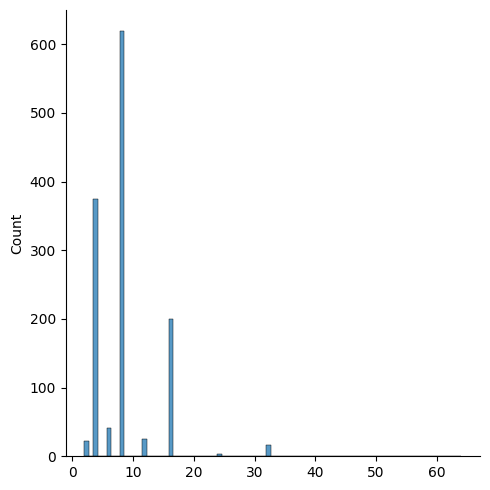

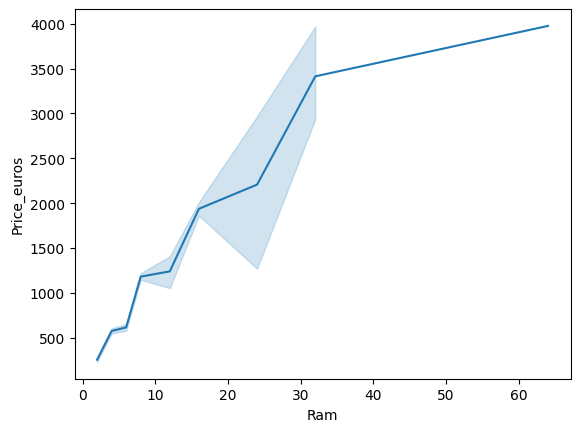

0.7430071352506946

In [ ]:
col = list(df['Ram'])
maxx = max(col)
minn = min(col)
average = sum(col) / len(col)
if len(col) % 2 == 0:
       mediana = (sorted(col)[len(col) // 2] + sorted(col)[len(col) // 2 + 1]) / 2
else:
       mediana = sorted(col)[len(col) // 2 + 1]
from math import sqrt
odchylenie = sqrt(sum([(x - average)**2 for x in col]) / len(col))
print("Statystyki:")
print(f"Max: {maxx}")
print(f"Min: {minn}")
print(f"Średnia: {average}")
print(f"Mediana: {mediana}")
print(f"Odchylenie standardowe: {odchylenie}")

sns.displot(col)
plt.show()

sns.lineplot(x=df['Ram'],y=df['Price_euros'])
plt.show()

df.corr(numeric_only=True)['Price_euros']['Ram']

to najlepsza pod każdym względem kolumna - średnia blisko mediany, dobra korelacja

####Heatmap

<Axes: >

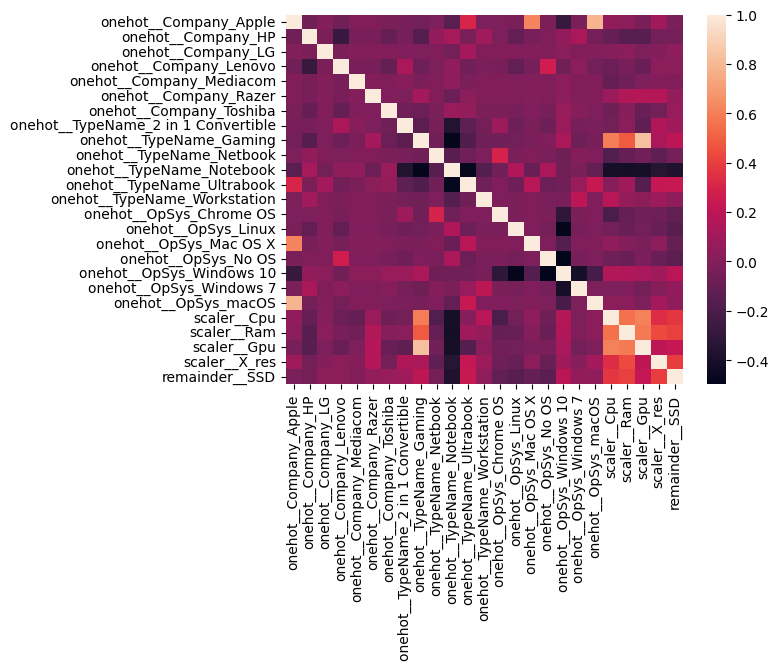

In [ ]:
sns.heatmap(x.corr(numeric_only=True))

<Axes: >

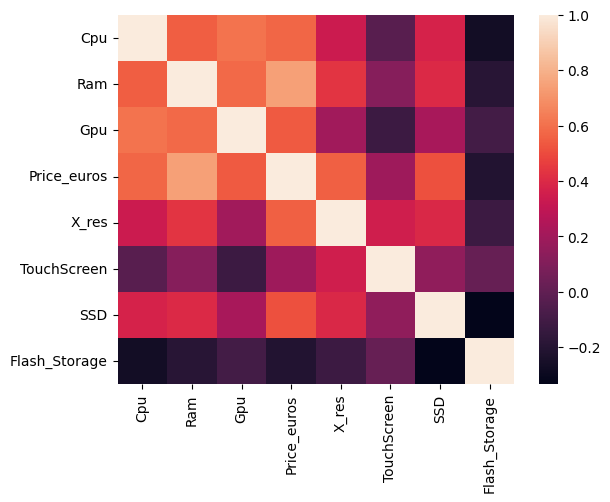

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

###Braki danych


Braki danych nie występują.

In [ ]:
print(data.isnull().sum())

laptop_ID        0
Company          0
Product          0
TypeName         0
Inches           0
Cpu              0
Ram              0
Gpu              0
OpSys            0
Weight           0
Price_euros      0
X_res            0
TouchScreen      0
SSD              0
Flash_Storage    0
dtype: int64


###Obserwacje odstające i jak je obsłużono


onamy wykres reszt oraz sprawdzimy jego rozkład normalny

Statystyka testu (dane treningowe): 0.9732940196990967
Rozkład reszt nie jest normalny (dane treningowe)


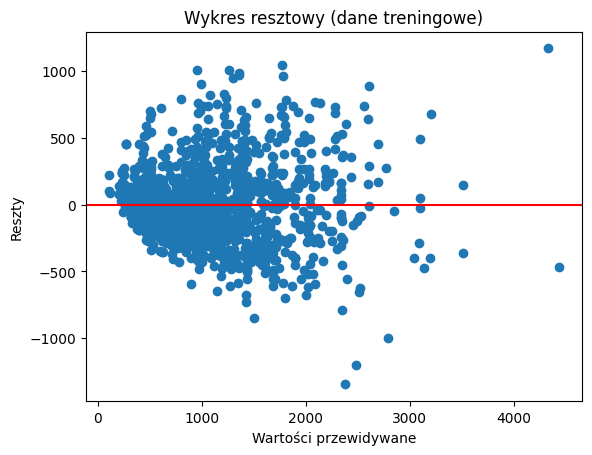

In [350]:
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x,y)
residuals_train = y - lr1.predict(x)

stat_train, p_train = stats.shapiro(residuals_train)

print('Statystyka testu (dane treningowe):', stat_train)

alpha = 0.05
if p_train > alpha:
    print('Nie ma dowodów na odrzucenie hipotezy o normalności rozkładu reszt (dane treningowe)')
else:
    print('Rozkład reszt nie jest normalny (dane treningowe)')

plt.scatter(lr1.predict(x), residuals_train)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Wykres resztowy (dane treningowe)')
plt.xlabel('Wartości przewidywane')
plt.ylabel('Reszty')
plt.show()

Z powodu zaobserwowanych odstajacych danych w modelu, należy je w odpowiedni sposób obsłóżyć. W tym konkretnym przypadku dane te usuniemy w celu uzyskania lepszych wyników regresji.

In [352]:
import numpy as np

print("Rozmiar x :", x.shape)
print("Rozmiar y :", y.shape)
indices_greater_than_1000 = np.where(residuals_train > 1000)[0]
indices_less_than_minus_1000 = np.where(residuals_train < -1000)[0]

x_filtered = np.delete(x, indices_greater_than_1000, axis=0)
x_filtered = np.delete(x_filtered, indices_less_than_minus_1000, axis=0)
print("Rozmiar x po usunięciu odstających wierszy:", x_filtered.shape)

y_filtered = np.delete(y, indices_greater_than_1000, axis=0)
y_filtered = np.delete(y_filtered, indices_less_than_minus_1000, axis=0)
print("Rozmiar y po usunięciu odstających wierszy:", y_filtered.shape)

x=x_filtered
y=y_filtered

Rozmiar x : (18, 1287)
Rozmiar y : (1287,)


IndexError: index 189 is out of bounds for axis 0 with size 18

zobaczmy teraz

Statystyka testu (dane treningowe): 0.9732940196990967
Rozkład reszt nie jest normalny (dane treningowe)


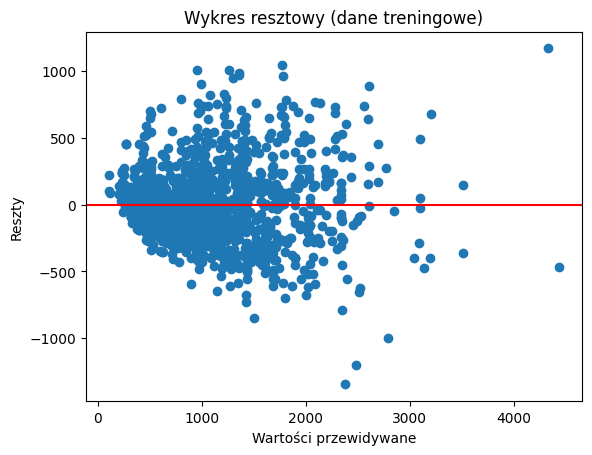

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x,y)
residuals_train = y - lr1.predict(x)

stat_train, p_train = stats.shapiro(residuals_train)

print('Statystyka testu (dane treningowe):', stat_train)

alpha = 0.05
if p_train > alpha:
    print('Nie ma dowodów na odrzucenie hipotezy o normalności rozkładu reszt (dane treningowe)')
else:
    print('Rozkład reszt nie jest normalny (dane treningowe)')

plt.scatter(lr1.predict(x), residuals_train)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Wykres resztowy (dane treningowe)')
plt.xlabel('Wartości przewidywane')
plt.ylabel('Reszty')
plt.show()

##Opis Metod

**Przetworzenie danych:**
Początkowo w celu dokonania wstepnej analizy danych przetworzono wszyskie dane do postaci liczbowej lub kategorycznej.

**Ocena istotnych cech:**
Następnie przy pomocy wiedzy eksperta oceniono które dane są istotne.

**Normalizacja danych liczbowych:**
Skonfrontowano różne konfiguracje kolumn z paroma modelami i wybrano najważniejsze kolumny - na liczbowych dokonano normalizacji, a na kategorycznych one-hot-encodingu

**Regresja liniowa:**
W nastepnej kolejności wykonano regresję liniową i policzono metryki ocen dla modeli regresji liniowej: MSE, RMSE oraz MAE.  Te metryki pomogły zrozumieć, jak dobrze model regresji liniowej radzi sobie z prognozowaniem cen laptopów na podstawie wybranych cech.

###Wzory wraz z opisami oznaczeń:



####**Metryk oceny modeli regresyjnych**

**Mean Absolute Error (MAE):**
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{test},i} - y_{\text{pred},i}|
$$


Oznaczenia:
* $n$ - liczba obserwacji
* $y_{test}$ - Wektor rzeczywistych wartości testowych.
* $y_{pred}$ - Wektor przewidywanych wartości.
* $MAE$ - Średnia wartość bezwzględna różnicy między rzeczywistymi a przewidywanymi wartościami.

**Mean Squared Error (MSE):**
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{test},i} - y_{\text{pred},i})^2
$$

Oznaczenia:
* $n$ - liczba obserwacji
* $y_{test}$ - Wektor rzeczywistych wartości testowych.
* $y_{pred}$ - Wektor przewidywanych wartości.
* $MSE$ - Średnia z kwadratów różnicy między rzeczywistymi a przewidywanymi wartościami.


**Root Mean Squared Error (RMSE):**
$$
RMSE = \sqrt{MSE}
$$

Oznaczenia:
* $n$ - liczba obserwacji
* $y_{test}$ - Wektor rzeczywistych wartości testowych.
* $y_{pred}$ - Wektor przewidywanych wartości.
* $RMSE$ - Pierwiastek z Mean Squared Error. Interpretuje się podobnie jak średni błąd, ale ma tę samą jednostkę co zmienna zależna.


**R2 Score (R2S):**
$$
R2S = 1 - \frac{\sum_{i=1}^{n} (y_{\text{test},i} - y_{\text{pred},i})^2}{\sum_{i=1}^{n} (y_{\text{test},i} - \bar{y}_{\text{test}})^2}
$$
Przyjmuje wartości od 0 do 1, gdzie 1 oznacza idealne dopasowanie.

Oznaczenia:
* $n$ - liczba obserwacji
* $y_{test}$ - Wektor rzeczywistych wartości testowych.
* $y_{pred}$ - Wektor przewidywanych wartości.
* $R2S$ - Współczynnik determinacji, miara dopasowania modelu do danych.


####**Modele Regresji**

**Regresja liniowa:**

Dopasowanie modelu:
Opis: Dopasowanie modelu polega na znalezieniu najlepszych wartości współczynników regresji, które minimalizują różnicę między wartościami przewidywanymi przez model a rzeczywistymi wartościami zmiennej zależnej.

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \varepsilon $$
Predykcja:
$$ Y = \beta_0 + \beta_1X_{test_1} + \beta_2X_{test_2} + \ldots + \beta_nX_{test_n} $$

Oznaczenia:
* $Y$ - zmienna zależna
* $X_1, X_2, ..., X_n$ - zmienne niezależne
* $\beta_0, \beta_1, \beta_2,..., \beta_n$ -  współczynniki regresji dla poszczególnych zmiennych niezależnych,
* $\varepsilon$ - bład losowy

Predykcja:
* $X_{test_n}$ - wartości zmiennych niezależnych w danych testowych.

##Przygotowanie rezultatów

W poniżej zostaną przeanalizowane rózne modele regresji w tym regresja liniowa. Na podstawie Metryk ocen modeli regresji: MAE, MSE, RMSE Poddamy ocenie poniższe modele w poszukiwaniu najbardziej dokładnego z nich.

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = mean_squared_error(ytest,ypred,squared=False)
    r2s = r2_score(ytest,ypred)
    percent_mae = mae/np.average(ytest)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse,"pMAE":percent_mae}

def model_res(model,x_train,x_test,y_train,y_test,ypred,mname):
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    w = eval_model(y_test,ypred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                    'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE'],'MAE as %':w['pMAE']}
    res = pd.DataFrame(res_metrics, index=[mname])
    return res, res_metrics

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1158, 18)
(129, 18)
(1158,)
(129,)


**Regresja liniowa**

In [ ]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
ypred_lr1 =  lr1.predict(x_test)
lr1_df,lr_res = model_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'LinReg')
lr1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE,MAE as %
LinReg,0.799599,0.81773,89757.687671,299.595874,230.594356,0.194849


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

dt = DecisionTreeRegressor(max_depth=8,min_samples_split=10,min_samples_leaf=10)
dt.fit(x_train,y_train)
ypred_dt = dt.predict(x_test)
dt_df,dt_res = model_res(dt,x_train,x_test,y_train,y_test,ypred_dt,'DTree_Reg')
dt_df


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE,MAE as %
DTree_Reg,0.818971,0.766112,115176.789489,339.377061,213.160115,0.180117


**KNeighbour**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNeighbors = KNeighborsRegressor()
KNeighbors.fit(x_train, y_train)
ypred_KNeighbors = KNeighbors.predict(x_test)
KNeighbors_df,KNeighbors_res = model_res(KNeighbors,x_train,x_test,y_train,y_test,ypred_KNeighbors,'KNeighbour_Reg')
KNeighbors_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE,MAE as %
KNeighbour_Reg,0.854596,0.828162,84620.569178,290.896148,213.17369,0.180129


**SDG**

In [ ]:
from sklearn.linear_model import SGDRegressor

sdg = SGDRegressor()
sdg.fit(x_train, y_train)
ypred_sdg = sdg.predict(x_test)
sdg_df,sdg_res = model_res(sdg,x_train,x_test,y_train,y_test,ypred_sdg,'SDG_Reg')
sdg_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE,MAE as %
SDG_Reg,0.790854,0.812278,92442.366395,304.043363,235.214376,0.198753


**Random Forest Regressor**

In [ ]:
rf = RandomForestRegressor(n_estimators=300,max_depth=10,min_samples_split=12)
rf.fit(x_train,y_train)
ypred_rf =  rf.predict(x_test)
rf_df,rf_res = model_res(rf,x_train,x_test,y_train,y_test,ypred_rf,'RF_Reg')
rf_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE,MAE as %
RF_Reg,0.895877,0.814622,91288.448258,302.139783,190.800055,0.161224


In [ ]:
rf2 = RandomForestRegressor(n_estimators=300,max_depth=9,min_samples_split=4)
rf2.fit(x_train,y_train)
ypred_rf1 =  rf.predict(x_test)
rf_df1,rf_re1s = model_res(rf2,x_train,x_test,y_train,y_test,ypred_rf1,'RF_Reg1')
rf_df1

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE,MAE as %
RF_Reg1,0.910014,0.818613,91288.448258,302.139783,190.800055,0.161224


**AdaBoost Regressor**

In [ ]:
ada = AdaBoostRegressor(n_estimators=200,random_state=8)
ada.fit(x_train,y_train)
ypred_ada = ada.predict(x_test)
ada_df,ada_res = model_res(ada,x_train,x_test,y_train,y_test,ypred_ada,'AdaBoost_Reg')
ada_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE,MAE as %
AdaBoost_Reg,0.706548,0.705395,145076.311406,380.888844,305.494773,0.258139


**XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor()
xgb1.fit(x_train,y_train)
ypred_xgb1 = xgb1.predict(x_test)
xgb_df,xgb_res = model_res(xgb1,x_train,x_test,y_train,y_test,ypred_xgb1,'XGBoost_Reg')
xgb_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE,MAE as %
XGBoost_Reg,0.960749,0.816572,90328.224893,300.546544,182.490747,0.154202


##Rezultaty

<Figure size 1000x600 with 0 Axes>

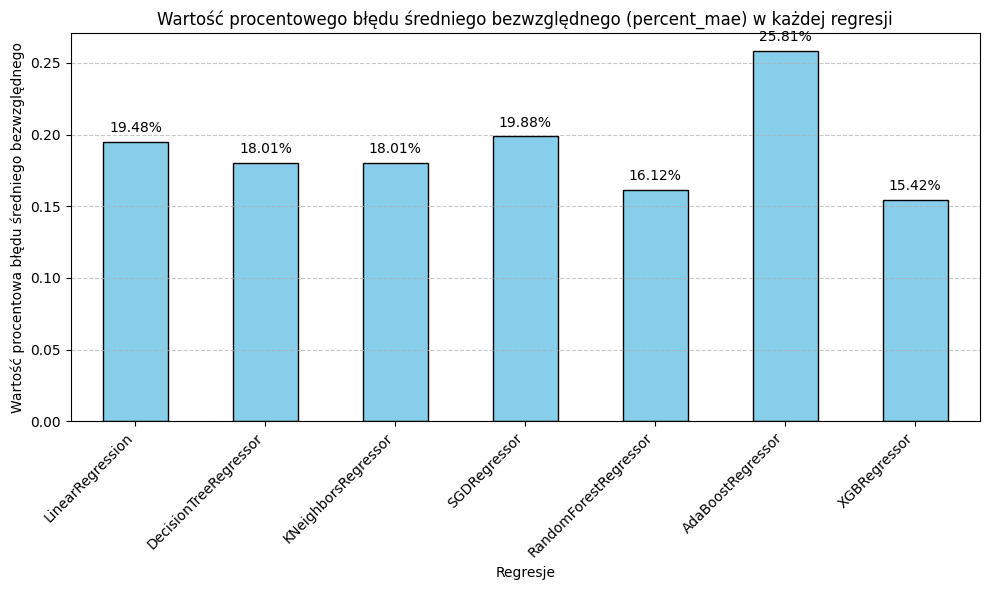

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = {}
regressions = ['LinearRegression', 'DecisionTreeRegressor', 'KNeighborsRegressor', 'SGDRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'XGBRegressor']
regressionsVal = {'LinearRegression': lr_res['MAE as %'],
                  'DecisionTreeRegressor': dt_res['MAE as %'],
                  'KNeighborsRegressor': KNeighbors_res['MAE as %'],
                  'SGDRegressor': sdg_res['MAE as %'],
                  'RandomForestRegressor': rf_res['MAE as %'],
                  'AdaBoostRegressor': ada_res['MAE as %'],
                  'XGBRegressor': xgb_res['MAE as %']}

for regression in regressions:
    results[regression] = regressionsVal[regression]

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Percent MAE'])

plt.figure(figsize=(10, 6))
ax = results_df.plot(kind='bar', legend=None, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Wartość procentowego błędu średniego bezwzględnego (percent_mae) w każdej regresji')
plt.xlabel('Regresje')
plt.ylabel('Wartość procentowa błędu średniego bezwzględnego')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Po wykonaniu analizy każdego z poszcególnych modeli regresji jesteśmy wstanie dokonać porównania oraz na tej podstawie wyciągnąć wniooski na temat dokładności każdego z poszcególnych modeli. Pozwoli nam to wybrać najodpowiedniejszy model do predykcji cen laptopów.

In [ ]:
all_res = pd.concat([lr1_df, dt_df, rf_df, ada_df, xgb_df, rf_df1, KNeighbors_df, sdg_df])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE,MAE as %
LinReg,0.799599,0.817730,89757.687671,299.595874,230.594356,0.194849
DTree_Reg,0.818971,0.766112,115176.789489,339.377061,213.160115,0.180117
RF_Reg,0.895877,0.814622,91288.448258,302.139783,190.800055,0.161224
AdaBoost_Reg,0.706548,0.705395,145076.311406,380.888844,305.494773,0.258139
XGBoost_Reg,0.960749,0.816572,90328.224893,300.546544,182.490747,0.154202
RF_Reg1,0.910014,0.818613,91288.448258,302.139783,190.800055,0.161224
KNeighbour_Reg,0.854596,0.828162,84620.569178,290.896148,213.173690,0.180129
SDG_Reg,0.790854,0.812278,92442.366395,304.043363,235.214376,0.198753


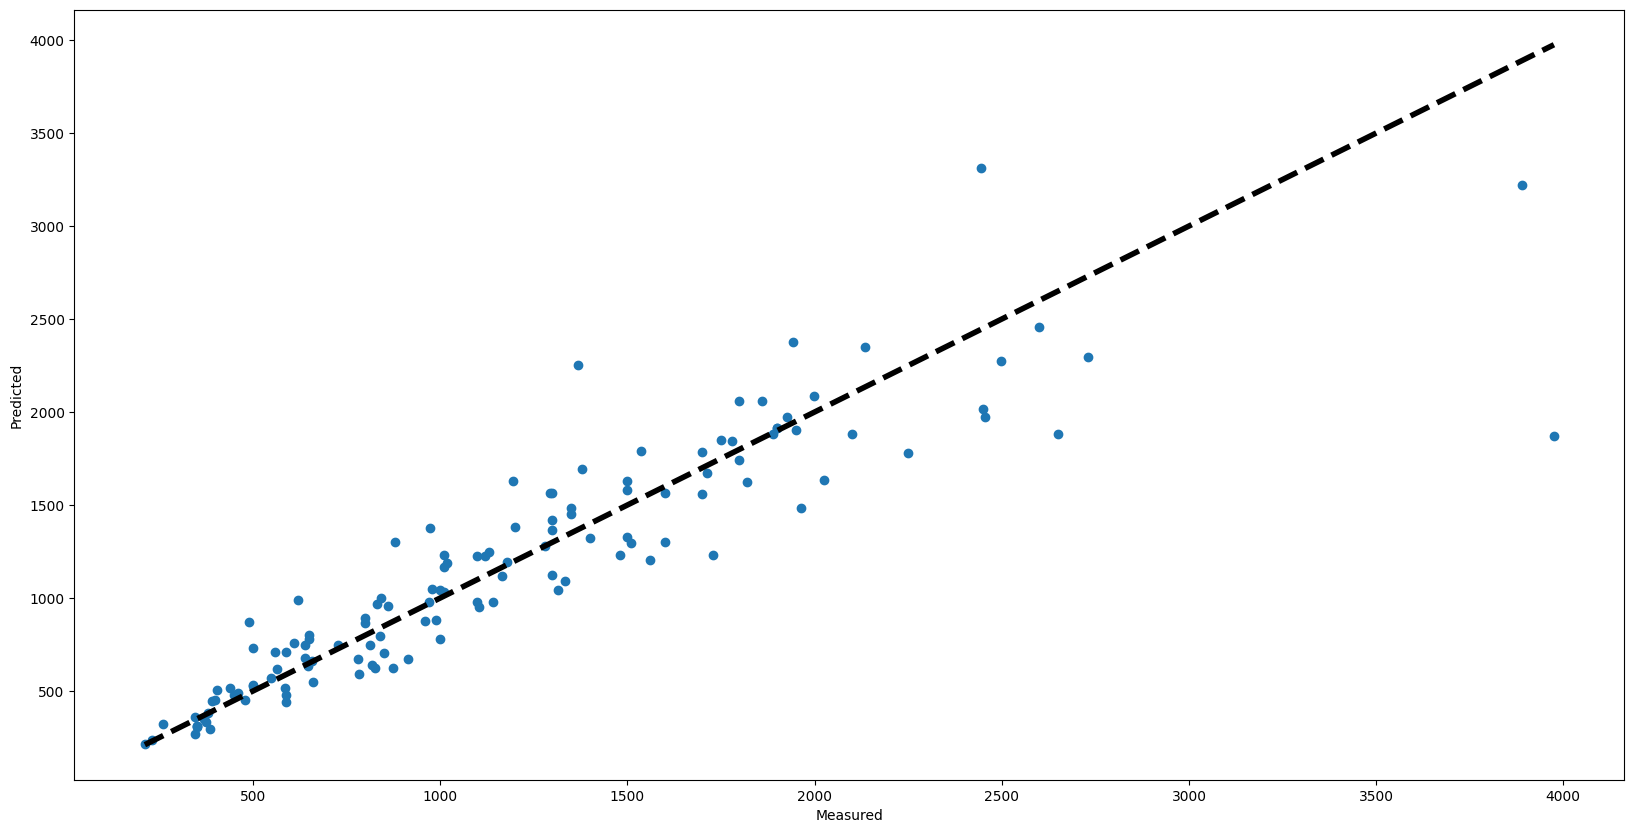

In [ ]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y_test, ypred_xgb1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##Podsumowanie

W ramach przeprowadzonej analizy wykonaliśmy predykcje cen laptopów przy uzyciu regresjii liniowej. Po przetworzeniu danych i wyborze cech przystąpiliśmy do budowy modelu regresji liniowej. Model ten został oceniony przy użyciu kilku metryk oceny wydajności, takich jak Mean Squared Error ($MSE$), Root Mean Squared Error ($RMSE$), Mean Absolute Error ($MAE$) oraz Coefficient of Determination ($R^2$).

Na podstawie wykonanych modeli jesteśmy wstanie stwierdzić, że regresja liniowa myli się średnio co do wartości bezwzględnej o 215 dolarów. Choć wartość ta jest znacząca, to mimo wszystko akceptowalna biorąc pod uwagę liczbę przyjętych danych i subiektywność wyceny. Znacznie lepszą wypadajnością tu okazały się modele regresji oparte na lasach losowych, takie jak RF_Reg i zwłaszcza XGBoost_Reg.

**Co można poprawić?**
* zebrać dużo więcej danych o laptopach, więcej kolumn i rzędów
* znaleźć bardziej kompletne dane z benchmarkami CPU i GPU
* zastosować techniki automatycznego wybierania parametrów, które zostaną wykorzystane w regresjach
* zastosować bardziej zaawansowane regresje i odpowiednio je skonfigurować

**Jak praca wypada na tle innych podejść?**
* żadna inna praca nie przetwarzała danych o CPU i GPU zczytywając benchmarki, jedynie robiono kategorie i3, i5 etc
* inne prace inaczej przetwarzały dane o pamięci - wykorzystywały informację o pojemności. W tej pracy uznano że to wymagałoby zbyt wiele przetwarzania danych, aby informacje stały się korzystne dla dokładności wyniku
* choć inne prace były często w innych walutach i na nieco innych zbiorach danych, dokładność wychodziła podobna lub gorsza

Podsumowując, podejście to było bardzo ciekawe dzięki zebraniu danych z benchmarków o CPU i GPU oraz dopasowaniu ich za pomocą Odległości Levenshteina biblioteką fuzzywuzzy. Jak jednak wymieniono wyżej, pozostaje wiele przestrzeni do poprawy

##Bibliografia
*Podczas przygotowywania raportu korzystaliśmy oraz czerpaliśmy wiedzę z:*



*   T. Peiru, "Research On Laptop Price Predictive Model Based on Linear Regression, Random Forest and Xgboost", 2023.
*   M. Kyosuke, "Analyzing online price by using machine learning techniques", 2018.
*   N. R. Draper, H. Smith, "Analiza regresji stosowana", 1973.
*   J. VanderPlas, "Python Data Science Handbook", 2023.
*   C. LReddy, K. B. Reddy, G. R. Anil, S. N. Mohanty, A. Basit, "Laptop Price Prediction Using Real Time Data", 2023